In [1]:
import csv
import cv2
import numpy as np
import sklearn
from math import pow, fabs, atan, sin, cos, pi, tan
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Open .csv file and store it's information into memory
samples = []

with open('C:/Users/Carlos/Desktop/data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

In [2]:
# Split original data lines into train and validation samples
train_samples, validation_samples = train_test_split(samples, test_size=0.2)

n_train = len(train_samples)
n_valid = len(validation_samples)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)

Number of training examples = 4404
Number of validation examples = 1102


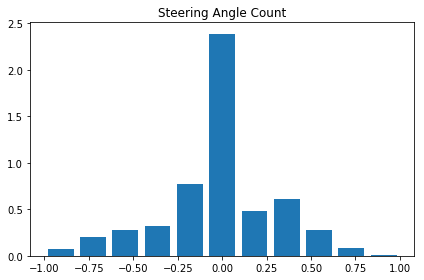

In [3]:
from matplotlib import pyplot as plt

# Plot of the percentage of occurrance for the different steering angles in the training set
fig, ax = plt.subplots()
# Create a histogram 
bins = np.linspace(-1,1,12)
angles_hist = [item[13] for item in train_samples]

# Put the angles into the relevant histogram bin
ax.hist(np.asarray(angles_hist,dtype=np.float64), bins, normed=1, histtype='bar', rwidth=0.8)
ax.set_title('Steering Angle Count')
fig.tight_layout()
plt.show()

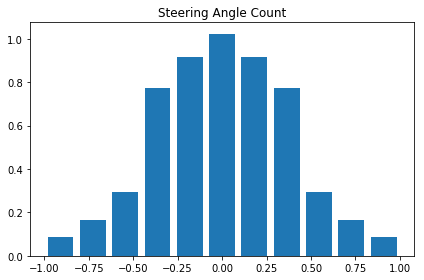

In [4]:
from matplotlib import pyplot as plt
# Plot of the percentage of occurrance for the different steering angles in the training set after
# using the additional cameras
fig, ax = plt.subplots()
# Create a histogram 
bins = np.linspace(-1,1,12)
angles_hist = [item[13] for item in train_samples]

# Calculate angles for additional cameras for the new histogram
new_angles = []
L = 2
for angle in angles_hist:
    angle = float(angle)*(25/90)*(pi/2)
    R = 0.43 / (pow(fabs(angle),6) + 0.01846); 
    angle_right = (atan(((sin(angle)*R - (L/2))/(cos(angle)*R))))/(pi/2)/(25/90);
    angle_left = (atan(((sin(angle)*R + (L/2))/(cos(angle)*R))))/(pi/2)/(25/90);
    angle_right2 = (atan(((sin(angle)*R - (L))/(cos(angle)*R))))/(pi/2)/(25/90);
    angle_left2 = (atan(((sin(angle)*R + (L))/(cos(angle)*R))))/(pi/2)/(25/90);
    angle_right3 = (atan(((sin(angle)*R - (3*L/2))/(cos(angle)*R))))/(pi/2)/(25/90);
    angle_left3 = (atan(((sin(angle)*R + (3*L/2))/(cos(angle)*R))))/(pi/2)/(25/90);
    angle_right4 = (atan(((sin(angle)*R - (4*L/2))/(cos(angle)*R))))/(pi/2)/(25/90);
    angle_left4 = (atan(((sin(angle)*R + (4*L/2))/(cos(angle)*R))))/(pi/2)/(25/90);
    new_angles.append(angle)
    new_angles.append(angle_right)
    new_angles.append(angle_left)
    new_angles.append(angle_right2)
    new_angles.append(angle_left2)
    new_angles.append(angle_right3)
    new_angles.append(angle_left3)
    new_angles.append(angle_right4)
    new_angles.append(angle_left4)
    new_angles.append(-angle)
    new_angles.append(-angle_right)
    new_angles.append(-angle_left)
    new_angles.append(-angle_right2)
    new_angles.append(-angle_left2)
    new_angles.append(-angle_right3)
    new_angles.append(-angle_left3)
    new_angles.append(-angle_right4)
    new_angles.append(-angle_left4)


ax.hist(np.asarray(new_angles,dtype=np.float64), bins, normed=1, histtype='bar', rwidth=0.8)
ax.set_title('Steering Angle Count')

fig.tight_layout()
plt.show()

In [5]:
#Data augmentation functions

def augment_brightness_camera_images(image):
    
    image_output = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    image_output = np.array(image_output, dtype = np.float64)
    random_bright = .5+np.random.uniform()
    image_output[:,:,2] = image_output[:,:,2]*random_bright
    image_output[:,:,2][image_output[:,:,2]>255]  = 255
    image_output = np.array(image_output, dtype = np.uint8)
    image_output = cv2.cvtColor(image_output,cv2.COLOR_HSV2RGB)
    return image_output

def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [-1, 1]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    mean = np.mean(image_data)
    std = np.std(image_data)
    image_data = (image_data - mean) / std
    maximum = np.amax(image_data)
    minimum = np.amin(image_data)
    a = -1
    b = 1
    image_output = a + ( ( (image_data - minimum)*(b - a) )/( maximum - minimum ) )

    return image_output

def preprocess_image(line_data):
    
    # Randomize camera selection
    rnd_cam = np.random.randint(9)
    # Read normalised angle and transform it to radias
    angle = float(line_data[13])*(25/90)*(pi/2)
    # Geometric parameters for angle calculation
    L = 2
    R = 0.43 / (pow(fabs(angle),6) + 0.01846); 
    
    # Calculate new angle for the selected camera and select image path
    if (rnd_cam == 0):
        path_file = 'C:/Users/Carlos/Desktop/data/IMG/'+line_data[0].split('\\')[-1]
        y_steer = float(line_data[13])
    if (rnd_cam == 1):
        path_file = 'C:/Users/Carlos/Desktop/data/IMG/'+line_data[1].split('\\')[-1]
        y_steer = (atan(((sin(angle)*R + (L/2))/(cos(angle)*R))))/(pi/2)/(25/90);
    if (rnd_cam == 2):
        path_file = 'C:/Users/Carlos/Desktop/data/IMG/'+line_data[2].split('\\')[-1]
        y_steer = (atan(((sin(angle)*R - (L/2))/(cos(angle)*R))))/(pi/2)/(25/90)
    if (rnd_cam == 3):
        path_file = 'C:/Users/Carlos/Desktop/data/IMG/'+line_data[3].split('\\')[-1]
        y_steer = (atan(((sin(angle)*R + (L))/(cos(angle)*R))))/(pi/2)/(25/90);
    if (rnd_cam == 4):
        path_file = 'C:/Users/Carlos/Desktop/data/IMG/'+line_data[4].split('\\')[-1]
        y_steer = (atan(((sin(angle)*R - (L))/(cos(angle)*R))))/(pi/2)/(25/90);
    if (rnd_cam == 5):
        path_file = 'C:/Users/Carlos/Desktop/data/IMG/'+line_data[5].split('\\')[-1]
        y_steer = (atan(((sin(angle)*R + (3*L/2))/(cos(angle)*R))))/(pi/2)/(25/90);
    if (rnd_cam == 6):
        path_file = 'C:/Users/Carlos/Desktop/data/IMG/'+line_data[6].split('\\')[-1]
        y_steer = (atan(((sin(angle)*R - (3*L/2))/(cos(angle)*R))))/(pi/2)/(25/90);
    if (rnd_cam == 7):
        path_file = 'C:/Users/Carlos/Desktop/data/IMG/'+line_data[7].split('\\')[-1]
        y_steer = (atan(((sin(angle)*R + (4*L/2))/(cos(angle)*R))))/(pi/2)/(25/90);
    if (rnd_cam == 8):
        path_file = 'C:/Users/Carlos/Desktop/data/IMG/'+line_data[8].split('\\')[-1]
        y_steer = (atan(((sin(angle)*R - (4*L/2))/(cos(angle)*R))))/(pi/2)/(25/90);
    
    # Read image
    image = cv2.imread(path_file)
    
    # Augment brightness
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = augment_brightness_camera_images(image)
    image_output = np.array(image)
    
    # Random flip image and angle
    ind_flip = np.random.randint(2)
    
    if ind_flip==0:
        image_output = cv2.flip(image_output,1)
        y_steer = -y_steer

    return image_output,y_steer

In [6]:
# Data generator
def generator(samples, batch_size=64):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        # Shuffle the data
        shuffle(samples)
        # Split data into batches
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            images = []
            angles = []
            for batch_sample in batch_samples:
                # Augment the data and get resulting image and angle
                image, angle = preprocess_image(batch_sample)
                images.append(image)
                angles.append(angle)

            # Return batch
            X_train = np.array(images)
            y_train = np.array(angles)
            yield sklearn.utils.shuffle(X_train, y_train)


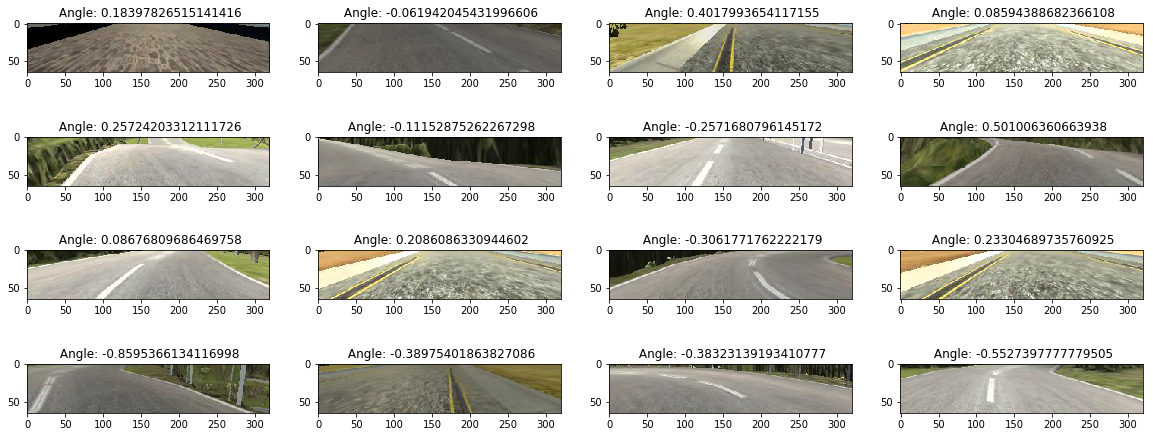

In [7]:
# Show some post processed image examples
%matplotlib inline
index_list = []
location_index_list = []
plt.subplots(figsize=(20, 8))
for i in range(0,16):   
    index = np.random.randint(0, len(train_samples))
    index_list.append(index)
    location_index = np.random.randint(0,2)
    location_index_list.append(location_index)
    plt.subplot(4,4, 1 + i)
    image, steer = preprocess_image(train_samples[index])
    plt.imshow(image[70:135,:])
    plt.title(' Angle: ' + str(steer) )

In [8]:
# Fit the data to generators
train_generator = generator(train_samples, batch_size=64)
validation_generator = generator(validation_samples, batch_size=64)

In [9]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Convolution2D, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint


# Model definition
model = Sequential()
model.add(Lambda(lambda x: x/127.5 - 1. , input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25), (0,0))))
model.add(Convolution2D(24,5,5,subsample=(2,2),activation='relu'))
model.add(Convolution2D(36,5,5,subsample=(2,2),activation='relu'))
model.add(Convolution2D(48,5,5,subsample=(2,2),activation='relu'))
model.add(Convolution2D(64,3,3,activation='relu'))
model.add(Convolution2D(64,3,3,activation='relu'))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Dense(1))

# Compile model, define callbacks and start training
model.compile(loss='mse', optimizer='adam')
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, verbose=0),
    ModelCheckpoint('./model.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', save_best_only=True, verbose=0)
]
model.fit_generator(train_generator, samples_per_epoch= len(train_samples)*9, validation_data=validation_generator,
                    nb_val_samples=len(validation_samples), nb_epoch=20, callbacks=callbacks)

Using TensorFlow backend.


Epoch 1/20
39636/39636 [==============================] - 560s - loss: 0.0451 - val_loss: 0.0238